# 0. Setup Paths

In [2]:
import os

In [5]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [6]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),

#   TO BE CHANGED ACCORDING TO YOUR LOCAL SETTINGS, IF TF models NOT INSTALLED IN YOUR MACHINE, THEN LEAVE AS:
#   'APIMODEL_PATH': os.path.join('Tensorflow','models')
    'APIMODEL_PATH': os.path.join('..\..\OD_TF','models'), # this is my personal path
    
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [13]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [14]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [8]:
# Download wget if you don't have it
if os.name=='nt':
    !pip install wget
    import wget

##### If TF models not installed, download and install
If you have TF models and ObjectDetection API installed on your machine then dont run the below 3 cells

In [6]:
# Download TF API
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    print('Downlaod tensorflow')
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [794]:
# Install Tensorflow Object Detection  --  ONLY REQUIRED IF TF API NOT ALREADY INSTALLED
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

        1 fichier(s) dÃ©placÃ©(s).


tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors
Le chemin dâ€™accÃ¨s spÃ©cifiÃ© est introuvable.
Le chemin dâ€™accÃ¨s spÃ©cifiÃ© est introuvable.


In [226]:
# VERIFICATION_SCRIPT
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
!python {VERIFICATION_SCRIPT}

### Download pretrained model

In [9]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

        1 fichier(s) dÃ©placÃ©(s).
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [12]:
labels = [{'name':'licence', 'id':1}, {'name':'squared_licence', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

NameError: name 'files' is not defined

# 3. Create TF records

In [11]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [12]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [13]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 fichier(s) copiÃ©(s).


# 5. Update Config For Transfer Learning

In [10]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [11]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

NameError: name 'files' is not defined

In [16]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [17]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [18]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [78]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [79]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

### You can choose to run in the Jupyter notebook or in the shell as advised by Nicknacknok to see the training evolution

In [ ]:
!{command}

# 7. Evaluate the Model

In [ ]:
# command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
# print(command)

In [ ]:
# !{command}

# 8. Load Train Model From Checkpoint

In [17]:
#  CHECK OF GPUs AVAILABLE
# I DONT HAVE NVIDIA ON MY MACHINE
gpus = tf.config.list_physical_devices('GPU')

In [18]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [19]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [20]:
# -- 03/01/2022 -- make sure you are running with open_cv version 4.5.3 (at least that one worked for me)  Later versions
# induced weird errors
import cv2 
print(cv2.__version__)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

4.5.3


In [21]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [22]:
# IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'cars344.png')
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'my_test_images', '40bl.png')

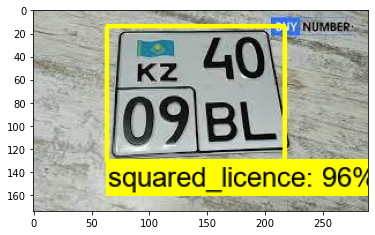

In [23]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Apply OCR to Detection

### 1) KERAS OCR

Having some weird none reproductible errors while running EasyOCR, I decided to try a different one. Keras_OCR being easy to implement, I gave it a try. It turned out that the problem was caused by the last version of Open_CV, I thus downgraded to 4.5.3 (see above) and that fixed my problem. 

Keras_OCR was finally less acurate than Easy_OCR, I kept it here for reference and **ONLY IMPLEMENTED THE ANPR SOLUTION with EasyOCR.**

So you can skip the next few cells till EasyOCR detection, or just run them to get a quick overview of their differences.

In [228]:
import keras_ocr

In [232]:
detection_threshold = 0.7

image = image_np_with_detections
boxes = detections['detection_boxes'][:len(scores)]

In [ ]:
width = image.shape[1]
height = image.shape[0]

box = boxes[0]
roi = box*[height, width, height, width]

region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [25]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\culturel\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\culturel\.keras-ocr\crnn_kurapan.h5


In [234]:
list_images = [region]
prediction = pipeline.recognize(list_images)

In [ ]:
for text, box in prediction[0]:
  print('Keratext)   

### 2) Easy OCR

In [24]:
import easyocr

In [25]:
detection_threshold = 0.7

image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

Using CPU. Note: This module is much faster with a GPU.


The plate number is  KZ40BL09


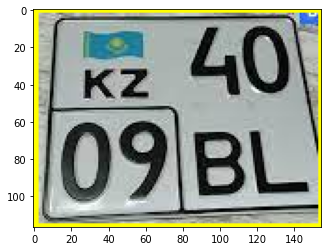

In [26]:
width = image.shape[1]
height = image.shape[0]

# For this example we only take the first boxe, the one which got the higher accuracy
box = boxes[0]
roi = box*[height, width, height, width]
region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]

# initiate the ocr
reader = easyocr.Reader(['en'], gpu=False)
plate_num = ''

if detections['detection_classes'][0] == 1:
    # If the plate is a squared one we split it into two halves and run the ocr on each of them
    region_left = region[:int(len(region)), :int(len(region[0])/2)]
    region_right = region[:int(len(region)), -int(len(region[0])/2):]
    
    ocr_result_left = reader.readtext(region_left)
    ocr_result_right = reader.readtext(region_right)
    
    # Then we put it together to display the number properly
    plate_num = ocr_result_left[0][1] + ocr_result_right[0][1] + ocr_result_right[1][1] + ocr_result_left[1][1]

else:
    # If the plate is not squared we simply detect the text and put them together one after another
    ocr_result = reader.readtext(region)
    
    for index, detection in enumerate(ocr_result):
        plate_num += detection[1] 


print('The plate number is ', plate_num)
plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))